# CSCI4022 Homework 1; Review

## Due Monday, February 1 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Problem 1 (Numerics... kind of; 15 points)

####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.


i) $$b= \begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=\begin{bmatrix}a_1 * x_1 + a_2 *x_2 \\ a_3 * x_1 + a_4* x_2\end{bmatrix}$$
 Number of Computations = $\sum (operations(+ , * )) = 6$ 
 
ii) $$b= \begin{bmatrix}a_1 & a_2 & a_3 \\ a_4 & a_5 & a_6 \\ a_7 & a_8 & a_9\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=\begin{bmatrix}a_1 * x_1 + a_2 * x_2 + a_3 * x_3 \\ a_4 * x_1 + a_5 * x_2 + a_6 * x_3 \\ a_7 * x_1 + a_8 * x_2 + a_9 * x_3 \end{bmatrix}$$
 Number of Computations = $\sum (operations(+ , * )) = 15$ 



####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


For each row there will be n-1 additions and n multiplications
Rows are defined by rows of A, which in this case is n...
Hence the total amount of operations $ = \sum_{i=0}^n ((n-1)+ n)  = n\times (2n-1) = 2n^2 -n \approx \Theta(n^{2})$

#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

For a single entry $c_{ij}$, would require the same operations as before (n multiplication,n-1 additions) however this time the vector is no longer $n\times 1 \to n\times n $matrix. Hence the amount of elements is now $n^2$, manipulation part b calculation we can arrive at $ = \sum_{i=0}^{n^2} ((n-1)+ n)  = n^2 \times (2n-1) = 2n^3 -n^2 \approx \Theta(n^{3})$ since it needs to be computed $n^2$ times. 

If $n=10^4$, the total computations would be $2(10^4)^3 -(10^4)^2 = 2(10^{12})-10^8 $ 

## Problem 2 (Distances and Plots; 15 points)

In this problem we will create what's known as a [*variogram*](https://en.wikipedia.org/wiki/Variogram), a plot that describes how much "distance between inputs matters" on a function that inputs locations and outputs some other variable of interest.  Click on the link to see what a variogram often looks like.

Variograms involve similar groupings to histograms, but instead of grouping data points by their actual values, they group *distances* (Euclidean, $L_2$ norm) between data points together on the $x$ axis.

We consider 4 functions.  f1 and f2 below are smooth, well defined trig functions, although one has a shorter period and larger amplitude than the other.  f3 and f4 add random noise - uniform and normal, respectively - to those first functions.

Note also the given code includes a way to plot 3D data (input $x_1$, $x_2$, output $f(x_1,x_2)$) in python as a heat map.

In [2]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

def f1(x, y):
    return np.sin(7*x+7)+3*np.sin(6*y)
Z1 = f1(X, Y)

def f2(x, y):
    return np.sin(10*x)+np.cos(10*y)
Z2 = f2(X, Y)
random.seed(4022)
Z3=Z1+(np.random.rand(20, 20))
Z4=Z2+(np.random.normal(0, 1, size=(20,20)))

Text(0.5, 1.0, 'Function 4: 2 plus normals')

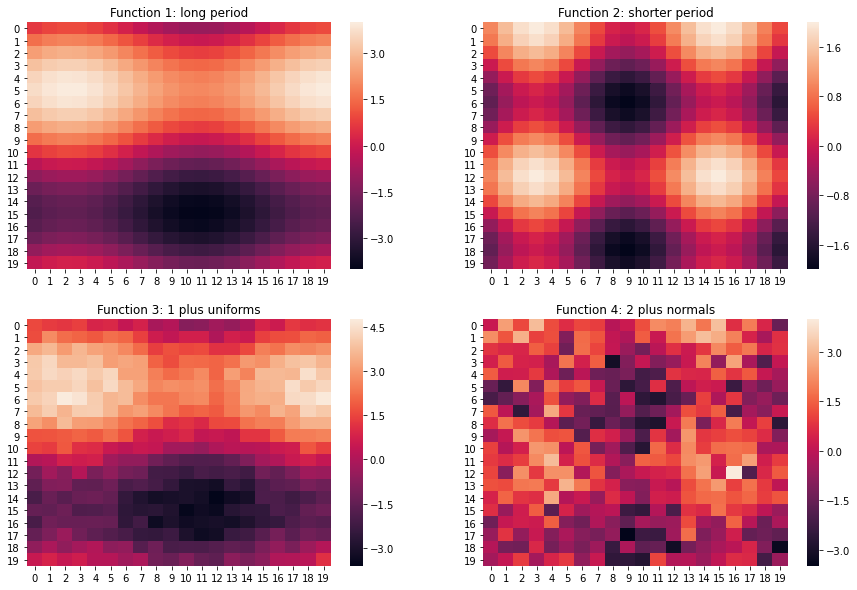

In [3]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
sns.heatmap(Z1, ax=axs[0,0])
axs[0,0].set_title('Function 1: long period')
sns.heatmap(Z2, ax=axs[0,1])
axs[0,1].set_title('Function 2: shorter period')
sns.heatmap(Z3, ax=axs[1,0])
axs[1,0].set_title('Function 3: 1 plus uniforms')
sns.heatmap(Z4, ax=axs[1,1])
axs[1,1].set_title('Function 4: 2 plus normals')

### Creating your own Variogram

For each of the 4 data sets, perform the following calculations, then create a 2x2 plot corresponding to the figure above where you depict the *variograms* of the 4 data sets.

##### a) Calculate all pairwise distances

Suppose we have a function $f$.  To create a variogram of $f$ given a set of observations,

- Take each and every pair of distinct data values $x=(x_1,x_2)$ and $y=(y_1,y_2)$, and computes the distance between those inputs $d((x_1, x_2), (y_1, y_2))$ and the squared distance between their outputs, $(f(x)-f(y))^2$.  If we had $n$ total data points there are $\binom{n}{2}$ such pairs.

Starting with the given code, you can get this by creating tuples out of the `X` and `Y` arrays.

Note that your distance matrix might be as large as $400\times 400$ for the given problem, although you may only need to fill around half of it due to its symmetry.

NB: You may also choose to create a numpy array of distances instead of a matrix if you prefer!

You should also calculate all pairwise squared deviations $(f(x)-f(y))^2$ in the same or a similar structure to your distance object.

In [4]:
coordMatrix=[]
for i in range(len(X)):
    test = tuple(zip(X[i], Y[i]))
    coordMatrix.append(test)
#print(np.array(coordMatrix))

def dist_funct(p1,p2):
    #np.sqrt(np.sum())
    #print(p1[0])
    #print(p2[0])
    r1=(p1[1]-p1[0])**2
    r2=(p2[1]-p2[0])**2
    return np.sqrt(r1+r2)

In [5]:
def deviate2(i1,j1,i2,j2,fun):
    #i1 = int(p1Index/20)
    #j1 = p1Index%20
    #i2 = int(p2Index/20)
    #j2 = p2Index%20
    if(fun ==1):
        #z1
        z1= Z1[i1][j1]
        z2= Z1[i2][j2]
        return (z2-z1)**2
    elif(fun == 2):
        #z2
        z1= Z2[i1][j1]
        z2= Z2[i2][j2]
        return (z2-z1)**2
    elif(fun == 3):
        #z3
        z1= Z3[i1][j1]
        z2= Z3[i2][j2]
        return (z2-z1)**2
    elif(fun == 4):
        #z4
        z1= Z4[i1][j1]
        z2= Z4[i2][j2]
        return (z2-z1)**2
    else:
        print("nooooooooooooooo")

In [6]:
#lets make a copy of distance Matrix we will use to fill up with distance
#distanceMatrix_f1 = coordMatrix.copy()
distanceMatrix = []
#for each function
devMatrix_f1 = []
devMatrix_f2 = []
devMatrix_f3 = []
devMatrix_f4 = []
count=0

for i in range(len(coordMatrix)):
    distanceArr =[]
    #for each function
    devArr_f1 = []
    devArr_f2 = []
    devArr_f3 = []
    devArr_f4 = []
    for j in range(len(coordMatrix[i])):
        
        point1 = coordMatrix[i][j]
        #now we have our first point - need to loop over every other point and call distance function on it
        innerKL = 0
        for k in range(len(coordMatrix)):#create loop
            for l in range(len(coordMatrix)):

                point2 = coordMatrix[k][l] #find point2
                if(point1!=point2):
                    #distanceList = list(distanceMatrix_f1[i][j])
                    #distanceList[0] = dist_funct(point1,point2)
                    #distanceMatrix_f1[i][j]= tuple(distanceList)
                    distanceArr.append(dist_funct(point1,point2)) #call distance funct and append value to array to append to matrix
                    #for each function
                    devArr_f1.append(deviate2(i,j,k,l,1))
                    devArr_f2.append(deviate2(i,j,k,l,2))
                    devArr_f3.append(deviate2(i,j,k,l,3))
                    devArr_f4.append(deviate2(i,j,k,l,4))
                    count+=1
                
                    
        
    distanceMatrix.append(distanceArr)
    #for each function
    devMatrix_f1.append(devArr_f1)
    devMatrix_f2.append(devArr_f2)
    devMatrix_f3.append(devArr_f3)
    devMatrix_f4.append(devArr_f4)
print("Amount of pairs of combinations:" +str(count))                    
#print(np.array(distanceMatrix))  
#print(len(distanceMatrix))
#print(np.array(devMatrix_f1))

Amount of pairs of combinations:159600


##### b) bin your data by distance

You should now have two lists/objects/matrices of total entires equal to $\binom{400}{2}$.  One holds distances, the other squared differences of $f$.

- Create "bins" as in a histogram.  Starting at $d=0$ and ending at the maximum observed distance, group each of the $(d(x,y), (f(x)-f(y))^2))$ pair into 20 total bins according to their distance.  So some points will go into the interval from $$[0, \frac{\max_{x,y} d(x,y)}{20}),$$ some into $$[\frac{\max_{x,y} d(x,y)}{20},2 \frac{\max_{x,y} d(x,y)}{20}),$$, and so forth.

In [7]:
#first we need to get max of distance matrix
maxDist = np.max(distanceMatrix)
    #print(maxDist/2)
#partition by 20 
stepDist = maxDist/20
#run through every point in coordMatrix
#print(distanceMatrix[0][0])

#probably make in to function call with devMatrix_f# as parameter
def binFunct(devMatrix):
    #binArr =[]
    bin1 =[]
    bin2 =[]
    bin3 =[]
    bin4 =[]
    bin5 =[]
    bin6 =[]
    bin7 =[]
    bin8 =[]
    bin9 =[]
    bin10 =[]
    bin11 =[]
    bin12 =[]
    bin13 =[]
    bin14 =[]
    bin15 =[]
    bin16 =[]
    bin17 =[]
    bin18 =[]
    bin19 =[]
    bin20 =[]
    for i in range(len(distanceMatrix)):
        for j in range(len(distanceMatrix[i])):
            dist = distanceMatrix[i][j]
            #return which array it would store
            if((dist < stepDist)and (dist>=0)):
                #bin1
                #grab the deviations
                f = devMatrix[i][j]
                bin1.append((dist,f))
                #print("Im in B1")
            elif((dist >= stepDist)and (dist < 2*stepDist)):
                #bin2
                f = devMatrix[i][j]
                bin2.append((dist,f))
                #print("Im in B2")
            elif((dist >= 2*stepDist)and (dist < 3*stepDist)):
                #bin3
                f = devMatrix[i][j]
                bin3.append((dist,f))
                #print("Im in B3")
            elif((dist >= 3*stepDist)and (dist < 4*stepDist)):
                #bin4
                f = devMatrix[i][j]
                bin4.append((dist,f))
            elif((dist >= 4*stepDist)and (dist < 5*stepDist)):
                #bin5
                f = devMatrix[i][j]
                bin5.append((dist,f))
            elif((dist >= 5*stepDist)and (dist < 6*stepDist)):
                #bin6
                f = devMatrix[i][j]
                bin6.append((dist,f))
            elif((dist >= 6*stepDist)and (dist < 7*stepDist)):
                #bin7
                f = devMatrix[i][j]
                bin7.append((dist,f))
            elif((dist >= 7*stepDist)and (dist < 8*stepDist)):
                #bin8
                f = devMatrix[i][j]
                bin8.append((dist,f))
            elif((dist >= 8*stepDist)and (dist < 9*stepDist)):
                #bin9
                f = devMatrix[i][j]
                bin9.append((dist,f))
            elif((dist >= 9*stepDist)and (dist < 10*stepDist)):
                #bin10
                f = devMatrix[i][j]
                bin10.append((dist,f))
            elif((dist >= 10*stepDist)and (dist < 11*stepDist)):
                #bin11
                f = devMatrix[i][j]
                bin11.append((dist,f))
            elif((dist >= 11*stepDist)and (dist < 12*stepDist)):
                #bin12
                f = devMatrix[i][j]
                bin12.append((dist,f))
            elif((dist >= 12*stepDist)and (dist < 13*stepDist)):
                #bin13
                f = devMatrix[i][j]
                bin13.append((dist,f))
            elif((dist >= 13*stepDist)and (dist < 14*stepDist)):
                #bin14
                f = devMatrix[i][j]
                bin14.append((dist,f))
            elif((dist >= 14*stepDist)and (dist < 15*stepDist)):
                #bin15
                f = devMatrix[i][j]
                bin15.append((dist,f))
            elif((dist >= 15*stepDist)and (dist < 16*stepDist)):
                #bin16
                f = devMatrix[i][j]
                bin16.append((dist,f))
            elif((dist >= 16*stepDist)and (dist < 17*stepDist)):
                #bin17
                f = devMatrix[i][j]
                bin17.append((dist,f))
            elif((dist >= 17*stepDist)and (dist < 18*stepDist)):
                #bin18
                f = devMatrix[i][j]
                bin18.append((dist,f))
            elif((dist >= 18*stepDist)and (dist < 19*stepDist)):
                #bin19
                f = devMatrix[i][j]
                bin19.append((dist,f))
            elif((dist >= 19*stepDist)and (dist <= maxDist)):
                #bin20
                f = devMatrix[i][j]
                bin20.append((dist,f))
            else:
                print('rip')
            
    #binArr
    binArr = [bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20]
    return binArr
binArr_f1 = binFunct(devMatrix_f1)
binArr_f2 = binFunct(devMatrix_f2)
binArr_f3 = binFunct(devMatrix_f3)
binArr_f4 = binFunct(devMatrix_f4)
#print(binArr_f1[0])

##### c) Create local averages

For each of the (hundreds!) of points within each bin, take the mean value of the $(f(x)-f(y))^2))$ deviations in that bin.

You should have a list of 20 average values.


In [8]:
def grabDeviations(binArr):
    devArr =[]
    for i in range(len(binArr)):
        devArr.append(binArr[i][1])
    return devArr
    #return list of deviations

In [9]:
def getDevArr(binArr,name):
    avgDevArr =[]
    for i in range(len(binArr)):
        #if(i ==0):
        #for a single bin we need one point returned of averaged deviations
        bin_Single = binArr[i]
            #print(bin_Single)
            #print("...")
        devArr = grabDeviations(bin_Single)
        devArr_Mean = np.mean(devArr)
        avgDevArr.append(devArr_Mean)
    print("Average Deviation Array of "+str(name)+": ")
    print(avgDevArr)
    return avgDevArr
#relabeling
newY_f1 = getDevArr(binArr_f1,"f1")
newY_f2 = getDevArr(binArr_f2,"f2")
newY_f3 = getDevArr(binArr_f3,"f3")
newY_f4 = getDevArr(binArr_f4,"f4")
#getDevArr(binArr_f1)

Average Deviation Array of f1: 
[12.010007220126159, 12.25625702450198, 12.106887949288874, 11.672295482401985, 10.966071374253625, 10.181929526638433, 9.751883176040554, 9.475437357004381, 9.679946588954216, 10.032836683856331, 9.795322539657457, 9.643640080702543, 8.923556821240549, 8.070239666259317, 7.358678320860766, 7.020749817289536, 6.5452687379625045, 5.31408039910049, 3.658130112436254, 1.5074870959949624]
Average Deviation Array of f2: 
[2.077292819985537, 2.0286635188730124, 1.9787886645084585, 1.9421765036670242, 1.9212026764885368, 1.9419549061771464, 1.9753822113766888, 2.0051226673340645, 2.0471276645194103, 2.0440810458290906, 2.025517775519312, 1.9459029002866222, 1.8322414995232656, 1.7461385267044824, 1.6552579194144896, 1.618904736667421, 1.5604560151501734, 1.4450765886669523, 1.2991891132554436, 1.056996163287164]
Average Deviation Array of f3: 
[12.56489383055361, 12.407664017191243, 12.386152818835457, 11.791107995923774, 11.043753213517094, 10.33241631389294, 

I saw this in markdown, was not sure if I should write anything. But here is what I did in part c. Which is I have now cycle through my bin matrix to find the output deviations and average them. Above is the output arrays. 

##### d) Create variograms

A variogram is a line plot with the center of each bin (the bins in part b) on the $x$-axis and the average squared deviation of points within that bin (found in part c) on the $y$-axis.

In the same 2x2 structure as the given code at the start of the problem, plot the 4 variograms for $F1, F2, F3,$ and $F4).


In [20]:
#print(stepDist)
#print(maxDist)
newX=[]
newX.append(0)
for i in range(1,20):
    lowBound = i*stepDist
    upperBound = (i+1)*stepDist
    #print("low: "+str(lowBound))
    #print("high: "+str(upperBound))
    center = (lowBound+upperBound)/2
    newX.append(center)
#print(len(newX))
print("These are new x values based on center of bins:")
print(newX)


These are new x values based on center of bins:
[0, 0.10606601717798213, 0.17677669529663687, 0.24748737341529164, 0.31819805153394637, 0.38890872965260115, 0.4596194077712559, 0.5303300858899107, 0.6010407640085653, 0.6717514421272202, 0.7424621202458749, 0.8131727983645296, 0.8838834764831844, 0.9545941546018392, 1.0253048327204939, 1.0960155108391487, 1.1667261889578033, 1.2374368670764582, 1.308147545195113, 1.3788582233137676]


Text(0.5, 1.0, 'Function 4: 2 plus normals')

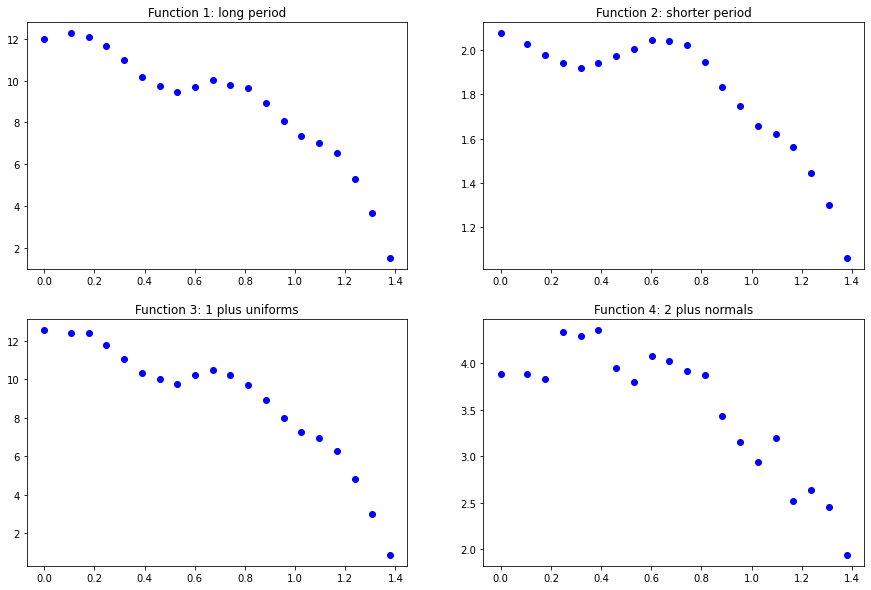

In [21]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0,0].plot(newX, newY_f1, 'bo')
#sns.heatmap(Z1_new, ax=axs[0,0])
axs[0,0].set_title('Function 1: long period')
#sns.heatmap(Z2_new, ax=axs[0,1])
axs[0,1].plot(newX, newY_f2, 'bo')
axs[0,1].set_title('Function 2: shorter period')
#sns.heatmap(Z3_new, ax=axs[1,0])
axs[1,0].plot(newX, newY_f3, 'bo')
axs[1,0].set_title('Function 3: 1 plus uniforms')
#sns.heatmap(Z4_new, ax=axs[1,1])
axs[1,1].plot(newX, newY_f4, 'bo')
axs[1,1].set_title('Function 4: 2 plus normals')

##### e) Interpret the variograms.  What do different values or features on the variograms appear to correspond to in terms of the shapes of the functions and added randomness of the 4 data sets?


Well first we take the presumption my code produced valid variograms(Idk if these are right?). But, lets examine them anyway. 

I would start by saying function 1 and function 2 have no form of randomness introduced. Lets examine Function 1 vs Function 3 as function 3 is f1 with uniforms added for randomness. Note that I believe that each point from f1 was tweaked buy the addition of the uniform as such it is shown through the avg. squared deviation to be either a little above or below its original avg. squared deviation.Lets look at when $x \approx .1$ which represent which range of distances that average squared deviation corresponds to (y). If we note, that for f3 the corresponding is below the mark 12, as in f1 the corresponding y is at 12. In general sense, the addition of uniform randomness changed the function minimally and did not seem well to add randomness keeping the curve somewhat the same. As for Function 2 and Function 4, I think the addition of 2 normals really randomized the data well. However, the overall picture of what function 2 used to be is still guessable from function 4. 

The last part I would want to mention is that all 4 functions seem have the x(avg of bin #'s range) and the y(functions output of the avg squarded deviations) inversely be porportional.(could be from error?)

## Problem 3 (Hypothesis Simulation; 15 points)


One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

### How correlated is really correlated?

The code below simulates from the bivariate normal distribution, which we'll use later this semester.  In brief, it simulates a list of points (called `rnorms` below) as an $j \times 2$ array where each of the `j` rows is an $(x,y)$ point.  We can either simulate these two column vectors $X$ and $Y$ so they're actually independent and the true correlation coefficient $\rho_{xy}=0$ OR we can simulate them with actual correlations included.

We want to know how much correlation is required for us to be able to meaningfully detect it.  Note that our simulated "*sample*" correlation coefficients never actually match the true value!

Example code:

Blue correlation coefficient: [[1.         0.06579047]
 [0.06579047 1.        ]]
Red correlation coefficient: [[1.         0.78755174]
 [0.78755174 1.        ]]


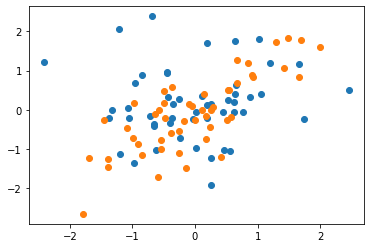

In [12]:
rho=0
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 indepenent N(0,1)
print('Blue correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look uncorrelated?


rho=.8
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 rho=.8 N(0,1)
print('Red correlation coefficient:', np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look correlated?


##### a) Our goal is to understand at what point we can actually tell whether or not things are correlated. To this end, let the example code above guide you to code that allows you to:

 - i) Generate a sample of `j=10` bivariate normals (of mean 0, variance 1) that are uncorrelated.  Calculate the correlation of this sample.
 - ii) Repeat step `i` 1000 times.  Save all 1000 correlation coefficients.
 - iii) Repeat steps `i` and `ii` for `j=100` and `j=1000`.  We now have 3000 correlation coefficients across 3 values of `j`.
 


In [13]:


def simMulti(j,rho):
    correlationArray =[]
    for i in range(1000):
        
        #i)
        rho=rho
        rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],j)  #sample of size j=j indepenent N(0,1)
        corr_samp =np.corrcoef(rnorms[:,0],y=rnorms[:,1])
        correlationArray.append(np.abs(corr_samp[0][1])) #np.abs(corr_samp[0][1])
        #print(corr_samp)
    return correlationArray
ccJ10 = simMulti(10,0)
ccJ100 = simMulti(100,0)
ccJ1000 = simMulti(1000,0)
#print(ccJ1000)

Consider testing the null hypothesis:
  - $H_0:$ These samples are uncorrelated
  
  against the alternative
  
  - $H_a:$ These samples have $\rho_{xy} \ne 0$.
  
#### b) At what sample correlations do we reject the null hypothesis if we set a probability of Type I error equal to .05?

This defines the *rejection region* for a statistical test of whether correlation is nonzero!

In [14]:
def testSim(trialValue_low,trialValue_high,arr):
    count=0
    for i in range(len(arr)):
        if((arr[i] > trialValue_high) or (arr[i] < trialValue_low)):
            #print(arr[i])
            count+=1
    simulatedPercent = count/len(arr)
    print("Sanity Check: The next output is to check if we have the right rejectiong region error percentage should equal the alpha value.")
    print("Type I error simulated: " +str(simulatedPercent))

#using np percentile functions we can approximate
def formatJ(arr,j):
    print("For j="+str(j)+" the rejection region is... ")
    low_025 = np.percentile(arr,2.5)
    high_025 = np.percentile(arr,97.5)
    #print("(   " + str(low_025) + " , " +str(high_025)+ " )")
    #print(high_025)
    #print("In other words we will reject if: ")
    print("correlation Value < " +str(low_025) + " or correlation Value > "+str(high_025))
    
    testSim(low_025,high_025,arr)
    print("_________________________________________________________________________________")
    return (low_025,high_025)
region10 = formatJ(ccJ10,10)
region100 = formatJ(ccJ100,100)
region1000= formatJ(ccJ1000,1000)

For j=10 the rejection region is... 
correlation Value < 0.01193463363203079 or correlation Value > 0.7127857658275577
Sanity Check: The next output is to check if we have the right rejectiong region error percentage should equal the alpha value.
Type I error simulated: 0.05
_________________________________________________________________________________
For j=100 the rejection region is... 
correlation Value < 0.002581427955523611 or correlation Value > 0.224211003025855
Sanity Check: The next output is to check if we have the right rejectiong region error percentage should equal the alpha value.
Type I error simulated: 0.05
_________________________________________________________________________________
For j=1000 the rejection region is... 
correlation Value < 0.0010229801367149364 or correlation Value > 0.06954319697709971
Sanity Check: The next output is to check if we have the right rejectiong region error percentage should equal the alpha value.
Type I error simulated: 0.05
__

As above each j has it own rejection regions based on max and min extreme values. I use the np.percentile to find bottom and top .025 % to use as rejection regions.

#### c) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=.1$.

Recall: power is defined as the probability of rejecting the null hypothesis - or being in the rejection region from part b) - when the true correlation was nonzero.  

In [15]:
ccJ10_1 = simMulti(10,.1)
ccJ100_1 = simMulti(100,.1)
ccJ1000_1 = simMulti(1000,.1)
#print(region10)
def probOfRejection(arr,bounds,j):
    count=0
    for i in range(len(arr)):
        if((arr[i] > bounds[1]) or (arr[i] < bounds[0])):
            #print(arr[i])
            count+=1
    simulatedPercent = count/len(arr)
    print("For j= "+str(j)+" the power is calculated using previous rejection regions...")
    print("The power for our test is "+str(simulatedPercent))
    print("___________________________________________________")
    return simulatedPercent
probOfRejection(ccJ10_1,region10,10)
probOfRejection(ccJ100_1,region100,100)
probOfRejection(ccJ1000_1,region1000,1000)
#side note we will use previously calculate rejection regions from part b) for each subsequent j value


For j= 10 the power is calculated using previous rejection regions...
The power for our test is 0.055
___________________________________________________
For j= 100 the power is calculated using previous rejection regions...
The power for our test is 0.124
___________________________________________________
For j= 1000 the power is calculated using previous rejection regions...
The power for our test is 0.825
___________________________________________________


0.825

It is good to note that this makes sense that as j (sample size) of each bivariate increases the power of the test increases as well.

#### d) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=-.1$.  Should this differ from part c)?

In [16]:
ccJ10_1_neg = simMulti(10,-.1)
ccJ100_1_neg = simMulti(100,-.1)
ccJ1000_1_neg = simMulti(1000,-.1)

probOfRejection(ccJ10_1_neg,region10,10)
probOfRejection(ccJ100_1_neg,region100,100)
probOfRejection(ccJ1000_1_neg,region1000,1000)

For j= 10 the power is calculated using previous rejection regions...
The power for our test is 0.058
___________________________________________________
For j= 100 the power is calculated using previous rejection regions...
The power for our test is 0.114
___________________________________________________
For j= 1000 the power is calculated using previous rejection regions...
The power for our test is 0.827
___________________________________________________


0.827

I don't not believe it should be different and if so minimally. As we know correlation is symetric so I would expect it yield similar results.